# includes

In [1]:
import mplfinance as mpf
import pandas as pd

from data_proc import DataProc
from capture_plot import CaptureOnClick
# SYMBOLS = ['BTCUSDT', 'ETHUSDT', 'SOLUSDT', 'AVAXUSDT']

from datetime import datetime, timedelta
import os

%matplotlib widget
#%matplotlib inline
#%matplotlib notebook


In [2]:
print(mpf.__version__)

0.12.10b0


# simple flow

## Configure data input

### Presets

- SYMBOLS = 'BTCUSDT', 'ETHUSDT', 'SOLUSDT', 'AVAXUSDT'
- INTERVALS = '1m', '3m', '5m', '15m', '30m', '1h', '2h', '4h', '6h', '8h', '12h', '1d', '3d', '1w', '1M'
- TOTAL_CANDLES = 100
- SYMBOL = 'BTCUSDT'
- DEF_INTERVAL = '1m'

SYMBOLS must be included into data_proc as well to create datastore structure (to be fixed)

In [3]:
#initialize data processor
TOTAL_CANDLES = 100

dp = DataProc('.\\.data\\ntb\\v0.0501a\\')

print(dp)

#### Configure data

In [4]:

#datamap initialized with two entries: BTCUSDT and ETHUSDT, each may hold candles data in corresponding interval from INTERVALS 
datamap = pd.DataFrame(dp.data_map)

#data is accumulated here, (TODO:and updated when needed )
datastore = pd.DataFrame(dp.pair_df_store)

#get one TOTAL_CANDLES set of OCHL+Volume for 
pair_df = pd.DataFrame(datastore['BTCUSDT']['1m'])

#default load:
last_updated = datamap['BTCUSDT']['1m']['Updated']
start_date = datamap['BTCUSDT']['1m']['StartDate']
end_date = datamap['BTCUSDT']['1m']['EndDate']

total_candles = pd

print (f'\nwe have: {TOTAL_CANDLES} candles of {dp.pair} at {dp.interval} loaded on {last_updated} between dates: {start_date} and {end_date} \n')
print(datamap.shape, datastore.shape, pair_df.shape, '\n')
print(pair_df.index[0:5], '\n')
print(pair_df[0:5], '\n')


we have: 100 candles of BTCUSDT at 1m loaded on 2023-12-18 20:01:03.189091 between dates: 2023-12-18 16:22:00-2023-12-18 18:01:00 

(15, 4) (15, 4) (100, 5) 

DatetimeIndex(['2023-12-18 16:22:00', '2023-12-18 16:23:00',
               '2023-12-18 16:24:00', '2023-12-18 16:25:00',
               '2023-12-18 16:26:00'],
              dtype='datetime64[ns]', name='Date', freq=None) 

                         Open      High       Low     Close    Volume
Date                                                                 
2023-12-18 16:22:00  41393.06  41416.53  41393.05  41403.51  20.07980
2023-12-18 16:23:00  41403.51  41422.92  41396.53  41413.38  19.96618
2023-12-18 16:24:00  41413.38  41413.39  41400.12  41406.00  20.29235
2023-12-18 16:25:00  41406.00  41421.10  41405.95  41417.99  14.07283
2023-12-18 16:26:00  41417.99  41419.36  41393.83  41401.76  29.72107 



#### Load data

In [ ]:
pair_df,_,_ = dp.get_new_data('BTCUSDT', '1h')

print(pair_df)

## Aquire selections
* left click places buy mark
* right click places sell mark
* shift+left click removes the nearest mark

File '.\.data\ntb\v0.0501a\mBTCUSDT-1m-2023-12-18.csv' does not exist. No points loaded.


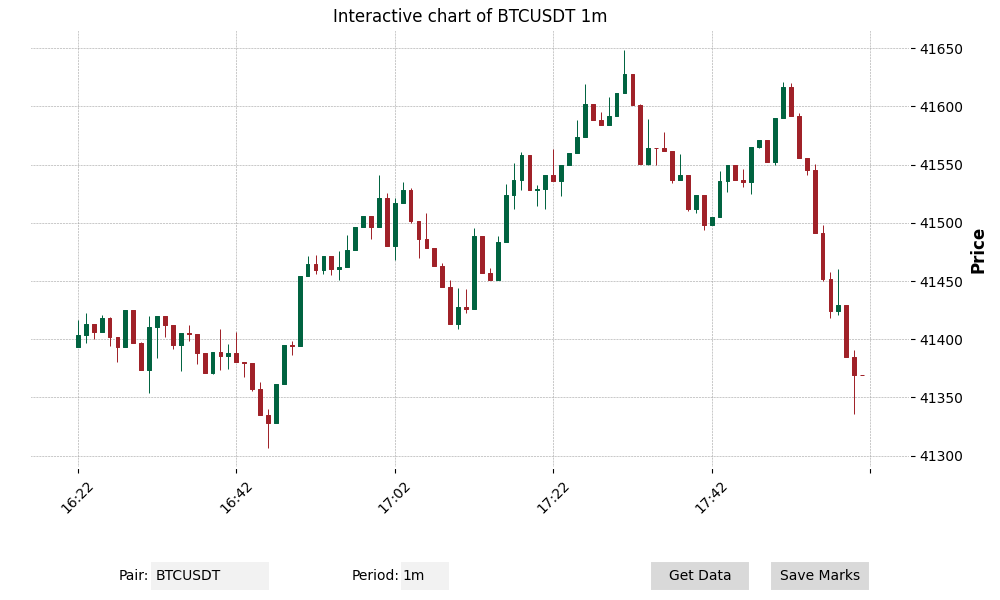

In [5]:
plotter_default = CaptureOnClick(data_proc=dp)
#plotter = CaptureOnClick(pair_df=pair_df, data_proc=dp)

## Utils. 
* Store selections

In [7]:
# Save points to file
# plotter.save_m_to_file()
plt = plotter_default
print(f'Current pair: {plt.pair} current interval: {plt.interval}')
   

Current pair: ETHUSDT current interval: 30m


## debug print from chart, on mouse click 

In [9]:
print(plt.captured_output)

Candle at 2023-12-18 16:42:00 is out of bounds. on_pick(): Figure clicked at: (384,18) |  on_pick(): Figure clicked at: (384,18) |  on_pick(): Figure clicked at: (384,18) | 


In [10]:
df = pd.DataFrame(datamap)

df = df.loc[:, df.notna().any()][:5]

print(df)

                                               BTCUSDT  \
1m   {'StartDate': 2023-12-18 16:22:00, 'EndDate': ...   
3m   {'StartDate': None, 'EndDate': None, 'Updated'...   
5m   {'StartDate': None, 'EndDate': None, 'Updated'...   
15m  {'StartDate': None, 'EndDate': None, 'Updated'...   
30m  {'StartDate': None, 'EndDate': None, 'Updated'...   

                                               ETHUSDT  \
1m   {'StartDate': 2023-12-18 16:24:00, 'EndDate': ...   
3m   {'StartDate': None, 'EndDate': None, 'Updated'...   
5m   {'StartDate': None, 'EndDate': None, 'Updated'...   
15m  {'StartDate': 2023-12-17 17:15:00, 'EndDate': ...   
30m  {'StartDate': 2023-12-16 16:30:00, 'EndDate': ...   

                                               SOLUSDT  \
1m   {'StartDate': None, 'EndDate': None, 'Updated'...   
3m   {'StartDate': None, 'EndDate': None, 'Updated'...   
5m   {'StartDate': None, 'EndDate': None, 'Updated'...   
15m  {'StartDate': None, 'EndDate': None, 'Updated'...   
30m  {'Start